# Proyecto Análisis de Negocio

Te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. El objetivo es ayudar a optimizar los gastos de marketing.

Los datos que se tienen son los siguientes:

- Registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- Archivo de volcado con todos los pedidos del período;
- Estadísticas de gastos de marketing.

Se necesita investigar:

- Cómo la gente usa el producto;
- Cuándo empiezan a comprar;
- Cuánto dinero trae cada cliente;
- Cuándo pagan.

## Tabla de contenidos <a id='back'></a>

* [Inicialización](#intro)
* [Descarga de datos y preparación](#descarga_preparación)
* [Creación de informes y cálculos de métricas](#informes_calculos)
* [Conclusión final](#conclusión_final)

## Inicialización <a id='intro'></a>

Para iniciar nuestro proyecto vamos a cargar nuestras librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Descarga de datos y preparación <a id='descarga_preparación'></a>

Vamos a cargar los datos de 3 dataset `/datasets/visits_log_us.csv`, `/datasets/orders_log_us.csv` y `/datasets/costs_us.csv`

In [2]:
# Carga los archivos de datos
data_visits = pd.read_csv('data/visits_log_us.csv')
data_orders = pd.read_csv('data/orders_log_us.csv')
data_costs = pd.read_csv('data/costs_us.csv')

In [3]:
# Verificamos que los datos se hayan cargado correctamente
print(data_visits.head())
print()
print(data_orders.head())
print()
print(data_costs.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-

Vamos a estudiar los datos que contienen nuestros datasets y verificar que los tipos de datos sean correctos para nuestro análisis

In [4]:
# Imprimimos la información general/resumen sobre nuestro primer dataset
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# Se imprime una muestra de los datos
data_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


El primer dataset `data_visits` que son los registros del servidor con datos sobre las visitas al sitio web, contiene los siguientes datos:

- `Uid`: identificador único del usuario.
- `Device`: dispositivo del usuario.
- `Start Ts`: fecha y hora de inicio de la sesión.
- `End Ts`: fecha y hora de término de la sesión.
- `Source Id`: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

In [6]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_visits.duplicated().sum())

Datos duplicados en el dataset: 0


#### Conclusiones del primer dataset

Al ver la muestra y resumen del dataset no encontramos datos faltantes ni duplicados, sin embargo podemos hacer unas optimizaciones en los tipos de datos de la columna `Device` y tambien debemos pasar los datos de las columnas `Start Ts` y `End Ts` a fecha. Tambien hay que mencionar que debido a la naturaleza de los datos númericos, no fue necesario ver una descripción de ellos

Pasamos al segundo dataset

In [7]:
# Imprimimos la información general/resumen sobre nuestro segundo dataset
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
# Se imprime una muestra de los datos
data_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


El segundo dataset `data_orders` que son los datos sobre pedidos, contiene los siguientes datos:

- `Uid`: identificador único del usuario que realiza un pedido.
- `Buy Ts`: fecha y hora del pedido.
- `Revenue`: ingresos de Y.Afisha de este pedido.

In [9]:
# Se imprime una descripción de los datos
data_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [10]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_orders.duplicated().sum())

Datos duplicados en el dataset: 0


#### Conclusiones del segundo dataset

Al ver la muestra y resumen del dataset no encontramos datos faltantes ni duplicados, sin embargo debemos pasar los datos de la columna `Buy Ts` a fecha. Tambien al ver la descripción de los datos numéricos vemos que la media de los ingresos es el doble que el de la mediana, además de que el 75% de los datos no llega a superar los $5, todo esto nos indica la presencia de valores outliers

Pasemos al 3er dataset

In [11]:
# Imprimimos la información general/resumen sobre el 3er dataset
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
# Se imprime una muestra de los datos
data_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


El tercer dataset `data_costs` que son los datos sobre gastos de marketing, contiene los siguientes datos:

- `source_id`: identificador de la fuente de anuncios.
- `dt`: fecha.
- `costs`: gastos en esta fuente de anuncios en este día.

In [13]:
# Se imprime una descripción de los datos
data_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [14]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_costs.duplicated().sum())

Datos duplicados en el dataset: 0


#### Conclusiones del tercer dataset

Al ver la muestra y resumen del dataset no encontramos datos faltantes ni duplicados, sin embargo debemos pasar los datos de la columna `dt` a fecha. Tambien al ver la descripción de los datos numéricos vemos que la media de los costos es casi el doble que el de la mediana, además de que el 75% de los datos no llega a superar los $170, todo esto nos indica la presencia de valores outliers

### Corregir datos

#### Primer dataset

Vamos a optimizar la columna `Device` a category y pasar las columnas `Start Ts` y `End Ts` a fecha

In [15]:
# Pasar device a tipo categoria
data_visits['Device'] = data_visits['Device'].astype('category')

# Pasar start ts y end ts a tipo fecha
data_visits['Start Ts'] =  pd.to_datetime(data_visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
data_visits['End Ts'] =  pd.to_datetime(data_visits['End Ts'], format="%Y.%m.%d %H:%M:%S")

In [16]:
# Verificamos que el cambio este hecho
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


#### Segundo dataset

Vamos a pasar la columna `Buy Ts` a fecha

In [17]:
# Pasar buy ts a tipo fecha
data_orders['Buy Ts'] =  pd.to_datetime(data_orders['Buy Ts'], format="%Y.%m.%d %H:%M:%S")

In [18]:
# Verificamos que el cambio este hecho
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### Tercer dataset

Vamos a pasar la columna `dt` a fecha

In [19]:
# Pasar dt a tipo fecha
data_costs['dt'] =  pd.to_datetime(data_costs['dt'], format="%Y.%m.%d")

In [20]:
# Verificamos que el cambio este hecho
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Con estas correcciones, nuestros dataset estan listos para nuestro análisis.

## Creación de informes y cálculo de métricas <a id='informes_calculos'></a>

#### Producto

Para nuestro primer informe, responderemos las siguientes preguntas del apartado de producto
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [21]:
# Vemos una muestra de nuestros datos
data_visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


##### ¿Cuántas personas lo usan cada día, semana y mes?

In [22]:
# Vemos el uso del producto por dia, semana y mes
data_visits['session_year']  = data_visits['Start Ts'].dt.year
data_visits['session_month'] = data_visits['Start Ts'].astype('datetime64[M]') 
data_visits['session_week']  = data_visits['Start Ts'].astype('datetime64[W]')
data_visits['session_date'] = data_visits['Start Ts'].dt.date
data_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [23]:
# Agrupacion por mes, semana y dia
dau_total_visits = data_visits.groupby('session_date').agg({'Uid': 'nunique'})
wau_total_visits = data_visits.groupby(['session_week']).agg({'Uid': 'nunique'})
mau_total_visits = data_visits.groupby(['session_month']).agg({'Uid': 'nunique'})

print('Los usuarios medios por dia son:', int(dau_total_visits.mean()))
print('Los usuarios medios por semana son:', int(wau_total_visits.mean()))
print('Los usuarios medios por mes son:', int(mau_total_visits.mean()))

Los usuarios medios por dia son: 907
Los usuarios medios por semana son: 5724
Los usuarios medios por mes son: 23228


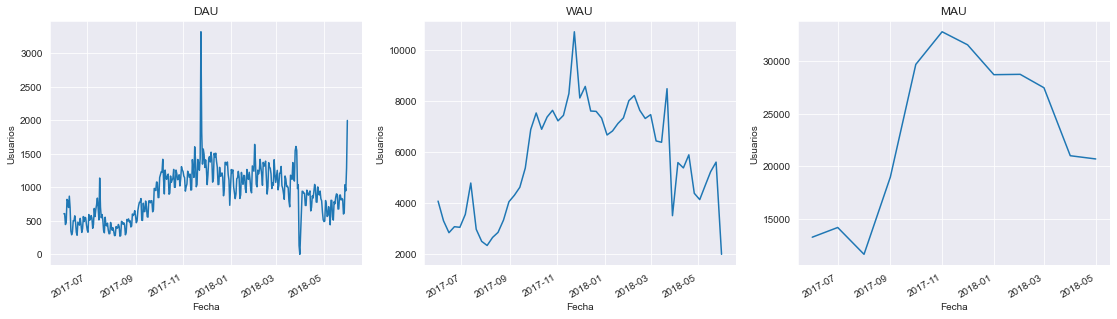

In [24]:
# Grafica de usuarios por dia, semana y mes
fig, ax = plt.subplots(1, 3, figsize=(19, 5))
ax[0].plot(dau_total_visits)
ax[0].set(title = 'DAU', xlabel = 'Fecha', ylabel = 'Usuarios')
ax[1].plot(wau_total_visits)
ax[1].set(title = 'WAU', xlabel = 'Fecha', ylabel = 'Usuarios')
ax[2].plot(mau_total_visits)
ax[2].set(title = 'MAU', xlabel = 'Fecha', ylabel = 'Usuarios')
fig.autofmt_xdate(rotation=30)
plt.show()

##### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [25]:
# Tabla para ver las sesiones y usuarios por dia
sessions_per_user = data_visits.groupby('session_date').agg(
    {'Uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print('El número de sesiones promedio por dia son:',sessions_per_user.sessions_per_user.mean())

El número de sesiones promedio por dia son: 1.0821696440039723


[Text(0.5, 1.0, 'Sesiones por usuario'),
 Text(0.5, 0, 'Fecha'),
 Text(0, 0.5, 'Sesiones')]

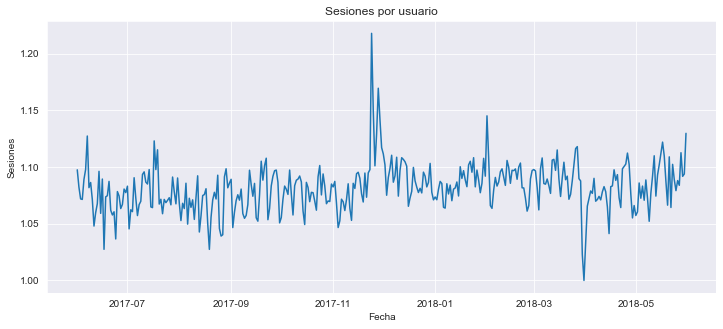

In [26]:
plt.figure(figsize= (12,5))
sessions_per_user['sessions_per_user'].plot().set(title = 'Sesiones por usuario', xlabel = 'Fecha', ylabel = 'Sesiones')

##### ¿Cuál es la duración de cada sesión?

<AxesSubplot:>

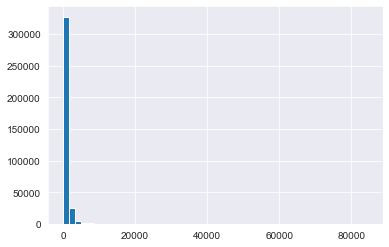

In [27]:
# Calcular ASL
data_visits['session_duration_sec'] = (data_visits['End Ts'] - data_visits['Start Ts']).dt.seconds

# Vemos la distribucion de las sesiones
data_visits['session_duration_sec'].hist(bins=50)

Vemos que nuestra distribución no es normal por lo que se recomienda ocupar la moda para calcular nuestra duración por sesion

In [28]:
print('La duración de cada sesión son:',int(data_visits['session_duration_sec'].mode()), 'segundos')

La duración de cada sesión son: 60 segundos


##### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [29]:
# Sticky factor para saber el nivel de lealtad de la audicencia
sticky_factor = int(dau_total_visits.mean()) / int(wau_total_visits.mean())
print(f'Los usuarios y usuarias regresan con una frecuencia de {sticky_factor:.2%} semanal.')

Los usuarios y usuarias regresan con una frecuencia de 15.85% semanal.


##### Conclusiones producto

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

Una vez realizado el análisis tenemos que:
- 907 personas ocupan el producto al dia, 5,716 a la semana y un total 23,228 personas al mes
- El número promedio de sesiones al dia es de 1 por usuario y tienen una duración de 60 segundos. Bastante rapida
- La frecuencia con la que regresan nuestros usuarios es de 15.85% cada semana

#### Ventas

Para nuestro segundo informe, responderemos las siguientes preguntas del apartado de producto
- ¿Cuándo la gente empieza a comprar? - (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
- ¿Cuántos pedidos hacen durante un período de tiempo dado?.
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

In [30]:
# Veamos una muestra de nuestros datos
data_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


##### ¿Cuándo la gente empieza a comprar?

In [31]:
# Generamos la fecha de la primera compra
first_buy_date = data_orders.groupby(['Uid'])['Buy Ts'].min().reset_index()
first_buy_date = first_buy_date.rename(
    columns={'Buy Ts': 'first_buy_date'}
)

# Checamos que la tabla
first_buy_date.head()

,Uid,first_buy_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [32]:
# Generamos la fecha de la primera visita al sitio
first_activity_date = data_visits.groupby(['Uid'])['Start Ts'].min().reset_index()
first_activity_date = first_activity_date.rename(
    columns={'Start Ts': 'first_activity_date'}
)
# Checamos que la tabla
first_activity_date.head()

,Uid,first_activity_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [33]:
# Unimos los datos de la primera visita al sitio web en las ordenes
first_buy_date = first_buy_date.merge(first_activity_date,on='Uid')

# Mostramos la adicion a los datos
first_buy_date.head()

,Uid,first_buy_date,first_activity_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [34]:
# Pasamos las fechas a date sin hora
first_buy_date['first_buy_date'] = first_buy_date['first_buy_date'].dt.date
first_buy_date['first_activity_date'] = first_buy_date['first_activity_date'].dt.date

# Verificamos el cambio
first_buy_date.head()

,Uid,first_buy_date,first_activity_date
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24


In [35]:
# Tiempo entre la primera visita y la primera compra
first_buy_date['wait_days'] = first_buy_date['first_buy_date'] - first_buy_date['first_activity_date']
first_buy_date['wait_days'] = first_buy_date['wait_days'] / np.timedelta64(1, 'D')
first_buy_date['wait_days'] = first_buy_date['wait_days'].astype(int)

# Verificamos los cambios
first_buy_date.head()

,Uid,first_buy_date,first_activity_date,wait_days
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0


<AxesSubplot:>

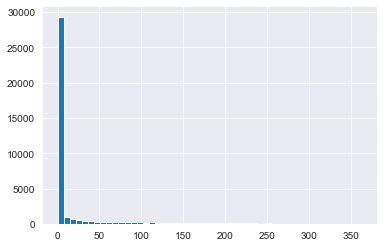

In [36]:
# Vemos la distribucion de los dias
first_buy_date['wait_days'].hist(bins=50)

Vemos que nuestra distribución no es normal por lo que se recomienda ocupar la moda para calcular nuestros dias de espera

In [37]:
print('La gente tarda',int(first_buy_date['wait_days'].mode()), 'días en hacer su primera compra')

La gente tarda 0 días en hacer su primera compra


##### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [38]:
# Agregamos el mes, año, semana y dia al dataframe
data_orders['order_year']  = data_orders['Buy Ts'].dt.year
data_orders['order_month'] = data_orders['Buy Ts'].astype('datetime64[M]')
data_orders['order_week']  = data_orders['Buy Ts'].astype('datetime64[W]')
data_orders['order_date'] = data_orders['Buy Ts'].dt.date

# Verificamos los datos agregados
print(data_orders.head())

               Buy Ts  Revenue                   Uid  order_year order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017  2017-06-01   

  order_week  order_date  
0 2017-06-01  2017-06-01  
1 2017-06-01  2017-06-01  
2 2017-06-01  2017-06-01  
3 2017-06-01  2017-06-01  
4 2017-06-01  2017-06-01  


In [39]:
# Agrupacion por mes, semana y dia
dau_total_orders = data_orders.groupby(['order_date', 'Uid'])['Buy Ts'].count().mean()
wau_total_orders = data_orders.groupby(['order_week', 'Uid'])['Buy Ts'].count().mean()
mau_total_orders = data_orders.groupby(['order_month', 'Uid'])['Buy Ts'].count().mean()
yau_total_orders = data_orders.groupby(['order_year', 'Uid'])['Buy Ts'].count().mean()

print('Los pedidos medios por comprador por dia son:', dau_total_orders)
print('Los pedidos medios por comprador por semana son:', wau_total_orders)
print('Los pedidos medios por comprador por mes son:', mau_total_orders)
print('Los pedidos medios por comprador por año son:', yau_total_orders)

Los pedidos medios por comprador por dia son: 1.0830755349316834
Los pedidos medios por comprador por semana son: 1.1627343804054522
Los pedidos medios por comprador por mes son: 1.2290645798288597
Los pedidos medios por comprador por año son: 1.3215287425620592


In [40]:
print('En general, los pedidos promedio por comprador son de:', data_orders.groupby('Uid')['Buy Ts'].count().mean())

En general, los pedidos promedio por comprador son de: 1.3803630588943954


##### ¿Cuál es el tamaño promedio de compra?

In [41]:
# Agrupación por mes, semana y día de el gasto hecho por los usuarios
dau_total_revenue = data_orders.groupby('order_date').agg({'Revenue': 'sum'}).mean()
wau_total_revenue = data_orders.groupby(['order_week']).agg({'Revenue': 'sum'}).mean()
mau_total_revenue = data_orders.groupby(['order_month']).agg({'Revenue': 'sum'}).mean()

print('El tamaño promedio de compra por dia son:', int(dau_total_revenue))
print('El tamaño promedio de compra por semana son:', int(wau_total_revenue))
print('El tamaño promedio de compra por mes son:', int(mau_total_revenue))

El tamaño promedio de compra por dia son: 692
El tamaño promedio de compra por semana son: 4755
El tamaño promedio de compra por mes son: 19389


In [42]:
print("La tamaño medio por pedido general es:", round(data_orders['Revenue'].mean(),2))

La tamaño medio por pedido general es: 5.0


##### ¿Cuánto dinero traen? (LTV)

In [43]:
# Tabla con el mes de la primera compra
first_orders = first_buy_date[['Uid','first_buy_date']].reset_index(drop=True)
first_orders['first_buy_month'] = first_orders['first_buy_date'].astype('datetime64[M]')
first_orders

,Uid,first_buy_date,first_buy_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18,2018-02-01


In [44]:
# Tabla con el mes de la primera visita
first_activity_date['first_activity_month'] = first_activity_date['first_activity_date'].astype('datetime64[M]')
first_activity_date

,Uid,first_activity_date,first_activity_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-01
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-01


In [45]:
# Construir un dataframe "buyers" que integre la información de las primeras visitas y las primeras compras
buyers = pd.merge(first_activity_date, first_orders, on='Uid')
buyers

,Uid,first_activity_date,first_activity_month,first_buy_date,first_buy_month
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-01
...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-01,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-01,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-01,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-01,2018-02-18,2018-02-01


In [46]:
# Se construye las cohortes con los datos de buyers
cohorts = pd.merge(data_orders, buyers,
                   how='inner', on='Uid').groupby(['first_buy_month',
                                                   'order_month']).agg({'Revenue': 'sum'}).reset_index()
# Calculamos el tiempo transcurrido desde la primer orden
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_buy_month']) / np.timedelta64(1,'M')).round()

# Seleccionamos solo las columnas que nos serviran para el calculo de ltv
cohorts.columns = ['first_buy_month', 'order_month', 'Revenue', 'age_month']

# Mostramos el dataframe
cohorts.head()

,first_buy_month,order_month,Revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0.0
1,2017-06-01,2017-07-01,981.82,1.0
2,2017-06-01,2017-08-01,885.34,2.0
3,2017-06-01,2017-09-01,1931.30,3.0
4,2017-06-01,2017-10-01,2068.58,4.0


In [47]:
# Construimos el dataframe cohort_sizes con el número de compradores en cada cohorte
cohort_sizes = buyers.groupby('first_buy_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'Uid': 'n_buyers'}, inplace=True)

# Mostramos el dataframe
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [48]:
# Vinculamos ambos dataframes en un solo para hacer el reporte
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')

# Creamos la columna LTV
cohorts_report['ltv'] = cohorts_report['Revenue'] / cohorts_report['n_buyers']

# Mostramos el dataframe resultante
cohorts_report.head()

,first_buy_month,n_buyers,order_month,Revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531


In [49]:
# Calculo de ltv
cohorts_ltv = cohorts_report.pivot_table(
    index='first_buy_month',
    columns='age_month',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

cohorts_ltv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


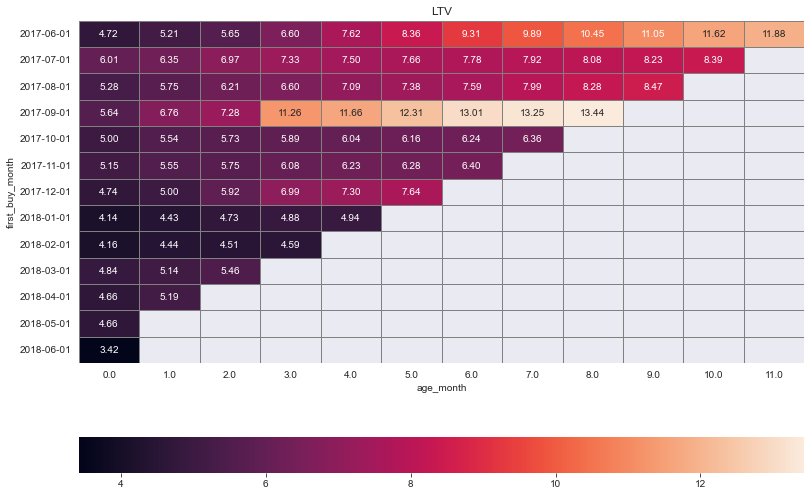

In [50]:
# Graficamos el LTV
plt.figure(figsize=(13, 9))
sns.heatmap(cohorts_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
           ).set(title='LTV', yticklabels=cohorts_ltv.index.astype('str'))
plt.show()

In [51]:
print('En promedio, cada cliente genero $', round(int(cohorts_report['ltv'].sum()) / cohorts_report['first_buy_month'].nunique(), 2), 'durante su ciclo de vida')

En promedio, cada cliente genero $ 6.92 durante su ciclo de vida


##### Conclusiones ventas

- ¿Cuándo la gente empieza a comprar?
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

Una vez realizado el análisis tenemos que:
- Las personas realizan su primer pedido en promedio el mismo dia que entran por primera vez a la web
- Tenemos una media de pedidos por usuario de 1 pedido, tambien se encontro que el tamaño promedio de la compra es de $\$5$
- En promedio, cada cliente genera $\$6.92$ durante su ciclo de vida

#### Marketing    

Para nuestro tercer informe, responderemos las siguientes preguntas del apartado de producto
- ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROI)

In [52]:
# Veamos una muestra de nuestros datos
data_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


##### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [53]:
# Agregamos el mes que se realizo el gasto
data_costs['cost_month'] = data_costs['dt'].astype('datetime64[M]')

# Creamos la tabla para ver el despliegue por mes
data_costs.pivot_table(
    index='source_id',
    columns='cost_month',
    values='costs',
    aggfunc='sum',
)

cost_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


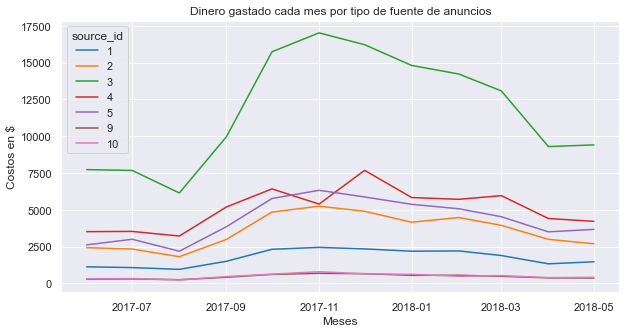

In [54]:
source_costs = data_costs.groupby(['source_id', 'cost_month'])['costs'].sum().reset_index()
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.lineplot(x="cost_month", y="costs",
             hue="source_id",
             data=source_costs, palette='tab10').set(title='Dinero gastado cada mes por tipo de fuente de anuncios',
                                xlabel='Meses', ylabel='Costos en $')

##### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [55]:
# Generamos el dataframe de los usuarios
users = data_visits.sort_values('Start Ts').groupby('Uid').first()
users

,Device,End Ts,Source Id,Start Ts,session_year,session_month,session_week,session_date,session_duration_sec
Uid,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,2018-03-01,2018-03-01,2018-03-01,360
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2018-02-01,2018-02-01,2018-02-06,120
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,2017-06-01,2017-06-01,2017-06-07,60
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-01,2017-09-14,2017-09-18,1080
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017,2017-09-01,2017-09-28,2017-09-30,540
...,...,...,...,...,...,...,...,...,...
18446403737806311543,desktop,2017-11-30 03:39:00,5,2017-11-30 03:36:00,2017,2017-11-01,2017-11-30,2017-11-30,180
18446424184725333426,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,2017,2017-12-01,2017-11-30,2017-12-06,0
18446556406699109058,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,2018,2018-01-01,2017-12-28,2018-01-01,120


In [56]:
# Tabla buyers
buyers

,Uid,first_activity_date,first_activity_month,first_buy_date,first_buy_month
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-01
...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-01,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-01,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-01,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-01,2018-02-18,2018-02-01


In [57]:
# Unimos nuestra tabla buyers previamente generada con la tabla de usuarios
buyers = pd.merge(buyers, users, left_on='Uid', right_index=True)
buyers

,Uid,first_activity_date,first_activity_month,first_buy_date,first_buy_month,Device,End Ts,Source Id,Start Ts,session_year,session_month,session_week,session_date,session_duration_sec
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2018-01-03,2018-01-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09-01,2017-09-14,2017-09-18,1080
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-01,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017,2017-06-01,2017-06-01,2017-06-03,240
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-01,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017,2017-10-01,2017-10-05,2017-10-11,780
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-28,2018-01-01,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018,2018-01-01,2018-01-25,2018-01-27,180
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-01,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017,2017-11-01,2017-11-23,2017-11-24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-01,2017-11-24,2017-11-01,touch,2017-08-20 13:30:00,5,2017-08-20 13:30:00,2017,2017-08-01,2017-08-17,2017-08-20,0
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-01,2017-09-22,2017-09-01,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017,2017-09-01,2017-09-21,2017-09-22,420
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-01,2018-03-26,2018-03-01,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017,2017-08-01,2017-08-03,2017-08-07,60
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-01,2018-02-18,2018-02-01,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017,2017-11-01,2017-11-02,2017-11-07,180


In [58]:
# Por fuente de anuncios, generamos los clientes por dia
buyers_daily = buyers.groupby(['Source Id', 'first_buy_date']).agg({'Uid': 'count'}).reset_index()
buyers_daily.rename(columns={'Uid': 'n_buyers'}, inplace=True)
buyers_daily['first_buy_date'] = pd.to_datetime(buyers_daily['first_buy_date'])
# Verificamos que el dataframe se haya generado correctamente
buyers_daily

,Source Id,first_buy_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [59]:
# Unimos nuestra tabla de clientes diarios con la tabla de costos
costs = pd.merge(buyers_daily, data_costs, left_on=['Source Id', 'first_buy_date'], right_on=['source_id', 'dt'])
costs.head()

,Source Id,first_buy_date,n_buyers,source_id,dt,costs,cost_month
0,1,2017-06-01,14,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,7,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,7,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,18,1,2017-06-05,57.08,2017-06-01


In [60]:
# Generamos el CAC
costs['cac'] = costs['costs'] / costs['n_buyers']
tabla_cac = costs.groupby('source_id').agg({'cac': 'mean'}).round(2)
tabla_cac = tabla_cac.reset_index()
tabla_cac

,source_id,cac
0,1,9.49
1,2,16.29
2,3,15.58
3,4,7.27
4,5,8.34
5,9,6.84
6,10,6.56


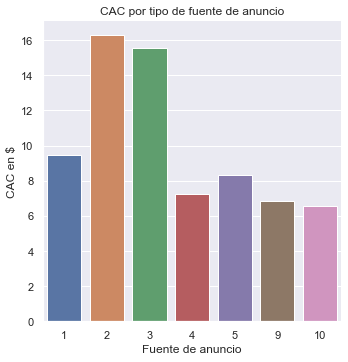

In [61]:
# Graficamos el CAC por source_id
sns.catplot(
    data=tabla_cac, kind="bar",
    x="source_id", y="cac").set(title='CAC por tipo de fuente de anuncio',
                                xlabel='Fuente de anuncio', ylabel='CAC en $')

##### ¿Cuán rentables eran las inversiones? (ROI)

In [62]:
# Generamos la tabla de los usuarios con la primera fuente de anuncios con la que llegaron
users_first_source = pd.merge(first_activity_date, data_visits[['Uid', 'Start Ts', 'Source Id']],
                              left_on=['first_activity_date', 'Uid'], right_on=['Start Ts', 'Uid'], how='inner')
users_first_source = users_first_source[['Uid', 'Source Id']]
users_first_source

,Uid,Source Id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228165,18446403737806311543,5
228166,18446424184725333426,4
228167,18446556406699109058,3
228168,18446621818809592527,4


In [63]:
# Agregamos los source id a la tabla de ordenes y agrupamos por source id y fecha para sacar el beneficio diario
data_orders_sources = data_orders.merge(users_first_source, on='Uid').groupby(['Source Id', 'order_date'])['Revenue'].sum()
data_orders_sources = data_orders_sources.reset_index()
data_orders_sources['order_date'] = pd.to_datetime(data_orders_sources['order_date'])

In [64]:
# Unimos nuestra tabla de clientes diarios con la tabla de beneficios
revenue = pd.merge(buyers_daily, data_orders_sources, left_on=['Source Id', 'first_buy_date'], right_on=['Source Id', 'order_date'])
revenue.head()

,Source Id,first_buy_date,n_buyers,order_date,Revenue
0,1,2017-06-01,14,2017-06-01,170.27
1,1,2017-06-02,7,2017-06-02,61.90
2,1,2017-06-03,7,2017-06-03,24.71
3,1,2017-06-04,3,2017-06-04,24.65
4,1,2017-06-05,18,2017-06-05,74.83


In [65]:
# Unimos nuestra tabla de clientes diarios con la tabla de costos
costs_revenue = pd.merge(revenue, data_costs, left_on=['Source Id', 'first_buy_date'], right_on=['source_id', 'dt'])
costs_revenue.head()

,Source Id,first_buy_date,n_buyers,order_date,Revenue,source_id,dt,costs,cost_month
0,1,2017-06-01,14,2017-06-01,170.27,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,7,2017-06-02,61.90,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,7,2017-06-03,24.71,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,3,2017-06-04,24.65,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,18,2017-06-05,74.83,1,2017-06-05,57.08,2017-06-01


In [66]:
# Generamos el CAC y LTV
costs_revenue['ltv'] = costs_revenue['Revenue'] / costs_revenue['n_buyers']
costs_revenue['cac'] = costs_revenue['costs'] / costs_revenue['n_buyers']

# Imprimimos la tabla
costs_revenue

,Source Id,first_buy_date,n_buyers,order_date,Revenue,source_id,dt,costs,cost_month,ltv,cac
0,1,2017-06-01,14,2017-06-01,170.27,1,2017-06-01,75.20,2017-06-01,12.162143,5.371429
1,1,2017-06-02,7,2017-06-02,61.90,1,2017-06-02,62.25,2017-06-01,8.842857,8.892857
2,1,2017-06-03,7,2017-06-03,24.71,1,2017-06-03,36.53,2017-06-01,3.530000,5.218571
3,1,2017-06-04,3,2017-06-04,24.65,1,2017-06-04,55.00,2017-06-01,8.216667,18.333333
4,1,2017-06-05,18,2017-06-05,74.83,1,2017-06-05,57.08,2017-06-01,4.157222,3.171111
...,...,...,...,...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,5.44,10,2018-05-27,9.92,2018-05-01,2.720000,4.960000
2429,10,2018-05-28,10,2018-05-28,14.36,10,2018-05-28,21.26,2018-05-01,1.436000,2.126000
2430,10,2018-05-29,7,2018-05-29,26.29,10,2018-05-29,11.32,2018-05-01,3.755714,1.617143
2431,10,2018-05-30,5,2018-05-30,9.28,10,2018-05-30,33.15,2018-05-01,1.856000,6.630000


In [67]:
# Generamos el ROMI
costs_revenue['romi'] = costs_revenue['ltv'] / costs_revenue['cac']
tabla_romi = costs_revenue.groupby('source_id').agg({'romi': 'mean'}).round(2)
tabla_romi = tabla_romi.reset_index()
tabla_romi

,source_id,romi
0,1,1.56
1,2,1.05
2,3,0.45
3,4,3.84
4,5,1.01
5,9,1.22
6,10,1.11


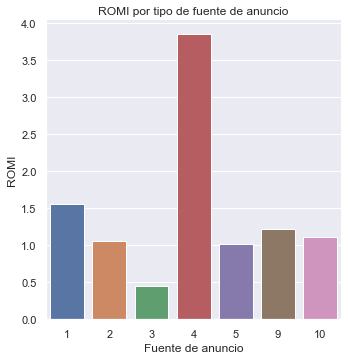

In [68]:
# Graficamos el ROMi por source_id
sns.catplot(
    data=tabla_romi, kind="bar",
    x="source_id", y="romi").set(title='ROMI por tipo de fuente de anuncio',
                                xlabel='Fuente de anuncio', ylabel='ROMI')

##### Conclusiones marketing

- ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROI)

Una vez realizado el análisis tenemos que:
- La fuente de anuncios 3 fue la que más dinero gasto a lo largo del tiempo, mientras que la fuente 10 fue la que menos dinero gasto.
- Las fuentes de anuncios 2 y 3 fue donde en promedio fue más costoso adquirir un cliente (superando los $\$14$) mientras que las fuentes 4, 9 y 10 es donde más barato fue conseguirlos
- Las fuente 4 tiene el ROMI más alto (superando los 3.5 puntos) mientras que la fuente 3 es la que menor ROMI nos entrega siendo este menor a de 0.5 puntos

## Conclusión final <a id='conclusión_final'></a>

¿Qué fuentes/plataformas recomendarías? Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Una vez recopilados los datos, tenemos los siguientes insights:

- La mayoria de las personas hacen su primer compra en su primer conexión al sitio, por lo que podemos inferir que la pagina es bastante intuitiva y sobre todo, asegurar que el 15.85% de los usuarios regresen cada semana.
- La gente se conecta solo una vez por dia y la duración de la sesión es de 60 segundos en promedio.
- Se tiene una media de 1 pedido por usuario y su tamaño de compra en promedio es de $\$5$
- Notamos que cada cliente en promedio aporta $\$6.92$ a lo largo de su ciclo de vida.
- El tipo de fuente de anuncios 3 es la que más dinero consume y con bastante diferencia respecto a las otras, además es en la que en promedio más costos fue adquirir un cliente (superando los $\$14$). Sin embargo, al ver el ROMI nos entrega menos de 0.5 puntos, siendo la ultima fuente en este aspecto.
- Por otro lado, se identifico que las fuentes 4, 9 y 10 son en las que menos dinero cuesta adquirir un cliente y especificamente, la fuente 4 es la que nos entrega el ROMI más alto superando los 3.5 puntos.

Tomando en cuenta los insights antes mencionados; recomendamos aumentar exponencialmente el dinero invertido en la fuente 4 ya que nos entregan mejor rendimiento entre el costo de adquirir un cliente y lo que gasta en la plataforma. Tambien recomendamos bajar el presupuesto a minimos de la fuente número 3 ya que el ROMI que nos entrega es el más bajo de todas las fuentes y su costo por cliente es altisimo.